# Forecasting Real Estate Market with Linear Regression

## Overview of Real Estate Market Dataset

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv", low_memory=False)

In [4]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN
997212,190344,2019,12/20/2019,Milford,250 RESEARCH DR,4035970.0,7450000.0,0.541700,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


In [7]:
data.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


In [8]:
data.shape

(997213, 14)

In [9]:
data.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [10]:
data.dtypes

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Assessor Remarks     object
OPM remarks          object
Location             object
dtype: object

# Cleaning Dataset

In [11]:
import numpy as np

In [12]:
missing_values_columns = data.isnull().sum()
print("Missing values in columns:")
print(missing_values_columns)

Missing values in columns:
Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64


In [13]:
missing_values_rows = data.isnull().any(axis=1)
print("Missing values in rows:")
print(missing_values_rows)

Missing values in rows:
0         True
1         True
2         True
3         True
4         True
          ... 
997208    True
997209    True
997210    True
997211    True
997212    True
Length: 997213, dtype: bool


In [14]:
duplicate_values = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicate_values)

Duplicate Rows:
Empty DataFrame
Columns: [Serial Number, List Year, Date Recorded, Town, Address, Assessed Value, Sale Amount, Sales Ratio, Property Type, Residential Type, Non Use Code, Assessor Remarks, OPM remarks, Location]
Index: []


In [15]:
data.dropna(axis=0,inplace=True)

In [16]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
759,200594,2020,02/16/2021,Danbury,8 HICKORY ST,121600.0,146216.0,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179)
933,200562,2020,02/03/2021,Danbury,19 MILL RD,263600.0,415000.0,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822)
1470,200260,2020,11/23/2020,Danbury,32 COALPIT HILL RD #4,84900.0,181778.0,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549)
2107,200148,2020,01/05/2021,Avon,23 CHEPACHET ROAD,165260.0,430000.0,0.384326,Residential,Condo,07 - Change in Property,Includes 120&124 Pequot Road,TOTAL RENOVATION PER MLS,POINT (-72.91856 41.77954)
2400,200000411,2020,09/10/2021,Brookfield,11 BRISTOL PATH,3770.0,180000.0,0.020944,Residential,Condo,25 - Other,GARAGE SOLD W/ CONDO,ALSO SEE #200000410,POINT (-73.39124 41.46698)


In [17]:
data.shape

(264, 14)

## Detecting & Removing Potential Outliers

In [18]:
z_threshold = 3
z_scores = np.abs((data["Sale Amount"]-data["Sale Amount"].mean())/data["Sale Amount"].std())

In [19]:
data["Sale Amount Outlier"] = np.where(z_scores > z_threshold, True, False)

In [20]:
existing_outlier = data[data["Sale Amount Outlier"]]
print("Existing Outilers:")
print(existing_outlier)

Existing Outilers:
       Serial Number  List Year Date Recorded        Town         Address  \
60822       20200078       2020    07/06/2021  Willington  224 RIVER ROAD   

       Assessed Value  Sale Amount  Sales Ratio Property Type  \
60822        223070.0  318790019.0       0.0007   Residential   

      Residential Type Non Use Code Assessor Remarks  \
60822    Single Family   25 - Other         COLONIAL   

                         OPM remarks                    Location  \
60822  INCORRECT SALE PRICE - NO MLS  POINT (-72.30341 41.86603)   

       Sale Amount Outlier  
60822                 True  


In [21]:
data = data[data["Sale Amount Outlier"]==False]

In [22]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale Amount Outlier
759,200594,2020,02/16/2021,Danbury,8 HICKORY ST,121600.0,146216.0,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179),False
933,200562,2020,02/03/2021,Danbury,19 MILL RD,263600.0,415000.0,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822),False
1470,200260,2020,11/23/2020,Danbury,32 COALPIT HILL RD #4,84900.0,181778.0,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549),False
2107,200148,2020,01/05/2021,Avon,23 CHEPACHET ROAD,165260.0,430000.0,0.384326,Residential,Condo,07 - Change in Property,Includes 120&124 Pequot Road,TOTAL RENOVATION PER MLS,POINT (-72.91856 41.77954),False
2400,200000411,2020,09/10/2021,Brookfield,11 BRISTOL PATH,3770.0,180000.0,0.020944,Residential,Condo,25 - Other,GARAGE SOLD W/ CONDO,ALSO SEE #200000410,POINT (-73.39124 41.46698),False


## Analyzing the Annual Mean and Median of Property Prices

In [23]:
import matplotlib.pyplot as plt

In [24]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale Amount Outlier
759,200594,2020,02/16/2021,Danbury,8 HICKORY ST,121600.0,146216.0,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179),False
933,200562,2020,02/03/2021,Danbury,19 MILL RD,263600.0,415000.0,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822),False
1470,200260,2020,11/23/2020,Danbury,32 COALPIT HILL RD #4,84900.0,181778.0,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549),False
2107,200148,2020,01/05/2021,Avon,23 CHEPACHET ROAD,165260.0,430000.0,0.384326,Residential,Condo,07 - Change in Property,Includes 120&124 Pequot Road,TOTAL RENOVATION PER MLS,POINT (-72.91856 41.77954),False
2400,200000411,2020,09/10/2021,Brookfield,11 BRISTOL PATH,3770.0,180000.0,0.020944,Residential,Condo,25 - Other,GARAGE SOLD W/ CONDO,ALSO SEE #200000410,POINT (-73.39124 41.46698),False


In [25]:
data["Date Recorded"] = pd.to_datetime(data["Date Recorded"])

In [26]:
data["Year"] =data["Date Recorded"].dt.year

In [27]:
annual_average_price = data.groupby("Year")["Sale Amount"].mean()
annual_median_price = data.groupby("Year")["Sale Amount"].median()

In [28]:
print("Annual Average Sale Price")
print(annual_average_price)
print("Annual Median Sale Price")
print(annual_median_price)

Annual Average Sale Price
Year
2017    197031.156250
2018    259195.272727
2019    239647.863636
2020    306981.873016
2021    489138.797101
Name: Sale Amount, dtype: float64
Annual Median Sale Price
Year
2017    136000.0
2018    120000.0
2019    172500.0
2020    205000.0
2021    340000.0
Name: Sale Amount, dtype: float64


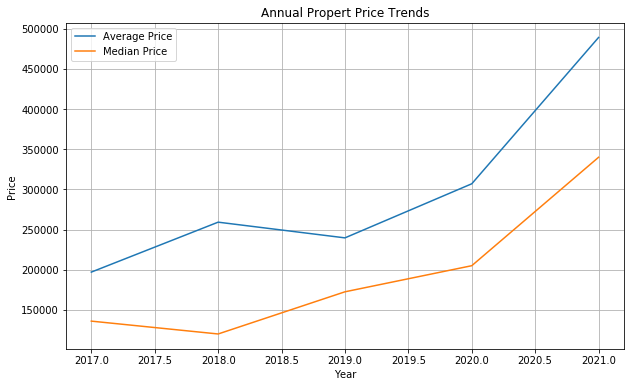

In [90]:
plt.figure(figsize=(10,6))
plt.plot(annual_average_price.index,annual_average_price.values,label="Average Price")
plt.plot(annual_median_price .index,annual_median_price.values,label="Median Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Annual Propert Price Trends")
plt.legend()
plt.grid(True)
plt.show()

## Finding Correlation Between Property Type&Price

In [92]:
import seaborn as sns

In [31]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale Amount Outlier,Year
759,200594,2020,2021-02-16,Danbury,8 HICKORY ST,121600.0,146216.0,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179),False,2021
933,200562,2020,2021-02-03,Danbury,19 MILL RD,263600.0,415000.0,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822),False,2021
1470,200260,2020,2020-11-23,Danbury,32 COALPIT HILL RD #4,84900.0,181778.0,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549),False,2020
2107,200148,2020,2021-01-05,Avon,23 CHEPACHET ROAD,165260.0,430000.0,0.384326,Residential,Condo,07 - Change in Property,Includes 120&124 Pequot Road,TOTAL RENOVATION PER MLS,POINT (-72.91856 41.77954),False,2021
2400,200000411,2020,2021-09-10,Brookfield,11 BRISTOL PATH,3770.0,180000.0,0.020944,Residential,Condo,25 - Other,GARAGE SOLD W/ CONDO,ALSO SEE #200000410,POINT (-73.39124 41.46698),False,2021


In [32]:
data["Date Recorded"] = pd.to_datetime(data["Date Recorded"])

In [33]:
data["Date Recorded"]

759      2021-02-16
933      2021-02-03
1470     2020-11-23
2107     2021-01-05
2400     2021-09-10
            ...    
988397   2020-08-17
988668   2020-06-17
988906   2019-10-28
989292   2020-06-08
993144   2020-01-06
Name: Date Recorded, Length: 263, dtype: datetime64[ns]

In [34]:
data["Year"] =data["Date Recorded"].dt.year

In [35]:
data["Year"]

759       2021
933       2021
1470      2020
2107      2021
2400      2021
          ... 
988397    2020
988668    2020
988906    2019
989292    2020
993144    2020
Name: Year, Length: 263, dtype: int64

In [36]:
annual_mean_price = data.groupby(['Year','Residential Type','Property Type'])["Sale Amount"].mean().reset_index()

In [37]:
annual_mean_price

,Year,Residential Type,Property Type,Sale Amount
0,2017,Condo,Condo,2.844990e+05
1,2017,Single Family,Single Family,1.922292e+05
2,2017,Three Family,Three Family,1.765000e+05
3,2017,Two Family,Two Family,1.320000e+05
4,2018,Condo,Condo,1.180500e+05
5,2018,Four Family,Four Family,2.043333e+06
6,2018,Single Family,Single Family,1.771669e+05
7,2018,Three Family,Three Family,1.038333e+05
8,2018,Two Family,Two Family,1.481667e+05
9,2019,Condo,Condo,2.343595e+05


In [38]:
pivot_table = annual_mean_price.pivot_table(values="Sale Amount",index="Year",columns=['Residential Type','Property Type'])

In [39]:
pivot_table

Residential Type          Condo                  Four Family  Single Family  \
Property Type             Condo    Residential   Four Family    Residential   
Year                                                                          
2017              284499.000000            NaN           NaN            NaN   
2018              118050.000000            NaN  2.043333e+06            NaN   
2019              234359.461538            NaN           NaN            NaN   
2020              247270.000000  253465.058824  4.750000e+05  459090.909091   
2021                        NaN  274838.250000           NaN  514400.360000   

Residential Type                Three Family                 Two Family  \
Property Type     Single Family  Residential   Three Family Residential   
Year                                                                      
2017              192229.166667          NaN  176500.000000         NaN   
2018              177166.875000          NaN  103833.333333         NaN   
2019              247101.178571          NaN  200000.000000         NaN   
2020              315606.000000          NaN            NaN    238000.0   
2021                        NaN    1080000.0            NaN    608750.0   

Residential Type                 
Property Type        Two Family  
Year                             
2017              132000.000000  
2018              148166.666667  
2019              189500.000000  
2020              121666.666667  
2021                        NaN

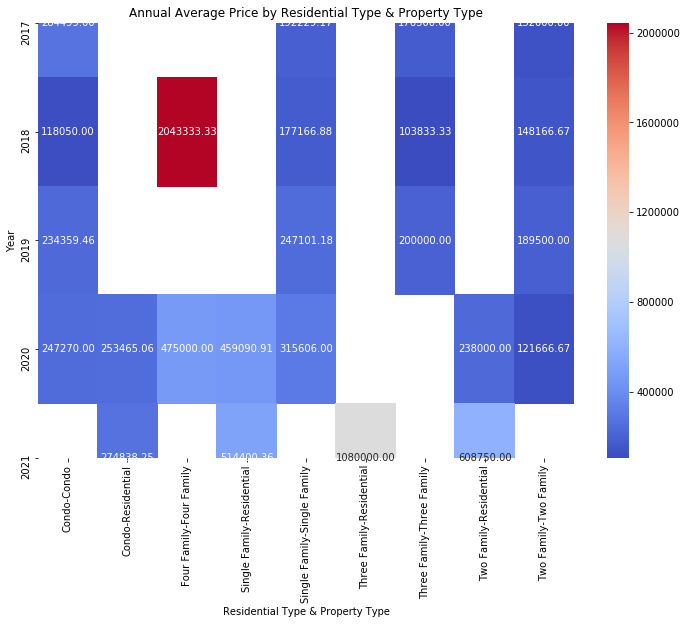

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale Amount Outlier,Year
759,200594,2020,2021-02-16,Danbury,8 HICKORY ST,121600.0,146216.0,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179),False,2021
933,200562,2020,2021-02-03,Danbury,19 MILL RD,263600.0,415000.0,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822),False,2021
1470,200260,2020,2020-11-23,Danbury,32 COALPIT HILL RD #4,84900.0,181778.0,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549),False,2020


In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table,cmap="coolwarm",annot=True,fmt=".2f",cbar=True)
plt.xlabel("Residential Type & Property Type")
plt.ylabel("Year")
plt.title("Annual Average Price by Residential Type & Property Type")
plt.show()

data.head(3)

## Analysing Real Market Trend & Finding Investment Opportunities

In [41]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale Amount Outlier,Year
759,200594,2020,2021-02-16,Danbury,8 HICKORY ST,121600.0,146216.0,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179),False,2021
933,200562,2020,2021-02-03,Danbury,19 MILL RD,263600.0,415000.0,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822),False,2021
1470,200260,2020,2020-11-23,Danbury,32 COALPIT HILL RD #4,84900.0,181778.0,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549),False,2020
2107,200148,2020,2021-01-05,Avon,23 CHEPACHET ROAD,165260.0,430000.0,0.384326,Residential,Condo,07 - Change in Property,Includes 120&124 Pequot Road,TOTAL RENOVATION PER MLS,POINT (-72.91856 41.77954),False,2021
2400,200000411,2020,2021-09-10,Brookfield,11 BRISTOL PATH,3770.0,180000.0,0.020944,Residential,Condo,25 - Other,GARAGE SOLD W/ CONDO,ALSO SEE #200000410,POINT (-73.39124 41.46698),False,2021


In [42]:
data["Date Recorded"] = pd.to_datetime(data["Date Recorded"])

In [43]:
data["Year"] =data["Date Recorded"].dt.year

In [44]:
annual_mean_sales_ratio = data.groupby("Year")["Sales Ratio"].mean()

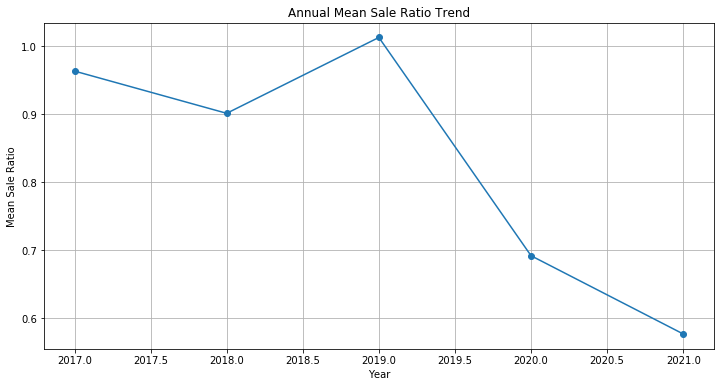

In [95]:
plt.figure(figsize=(12,6))
plt.plot(annual_mean_sales_ratio.index,annual_mean_sales_ratio,marker='o',linestyle='-')
plt.xlabel("Year")
plt.ylabel("Mean Sale Ratio")
plt.title("Annual Mean Sale Ratio Trend")
plt.grid(True)
plt.show()

In [46]:
threshold_ratio = 0.8
low_ratio_properties = data[data["Sales Ratio"]<threshold_ratio]

In [47]:
print("Potential Investment Opportunities:")
print(low_ratio_properties[["Address","Sale Amount","Assessed Value","Sales Ratio"]])

Potential Investment Opportunities:
                      Address  Sale Amount  Assessed Value  Sales Ratio
933               19  MILL RD     415000.0        263600.0     0.635181
1470    32 COALPIT HILL RD #4     181778.0         84900.0     0.467053
2107        23 CHEPACHET ROAD     430000.0        165260.0     0.384326
2400          11 BRISTOL PATH     180000.0          3770.0     0.020944
2662    32 COALPIT HILL RD #6     181778.0         84900.0     0.467053
...                       ...          ...             ...          ...
967922          128 MARTIN RD     255000.0        115080.0     0.451300
973206           5108 MAIN ST     362000.0        169890.0     0.469309
975297        36 DARTMOUTH LA     320000.0        169200.0     0.528800
984216       23 WALTON STREET     520000.0        151600.0     0.291538
988906          129 CAYUGA DR     157000.0         68200.0     0.434400

[150 rows x 4 columns]


In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

In [49]:
old_data = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv", low_memory=False)

In [50]:
old_data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [51]:
old_data["Date Recorded"] = pd.to_datetime(data["Date Recorded"])

In [52]:
old_data.set_index("Date Recorded",inplace=True)

In [53]:
y = old_data["Sale Amount"].values

In [54]:
X = old_data[["Assessed Value"]].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [56]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [57]:
forecastedyear = 2050
forecasted_price_lr = lr_model.predict(np.array([[forecastedyear]]))

In [58]:
print(f"Year {forecastedyear}: Predicted Price: ${float(forecasted_price_lr[0]):.2f}")

Year 2050: Predicted Price: $268736.23


## Forecasting Real Estate with LSTM Model 

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import joblib

In [88]:
old_data = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv")

In [61]:
old_data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [62]:
old_data["Date Recorded"] = pd.to_datetime(old_data["Date Recorded"])

In [63]:
old_data.set_index("Date Recorded",inplace=True)

In [64]:
y = old_data["Sale Amount"].values

In [65]:
X = old_data[["Assessed Value"]].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [67]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1,X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1,X_test_scaled.shape[1])

In [69]:
lstm_model = Sequential()
lstm_model.add(LSTM(50,activation='relu',input_shape=(1,X_train_scaled.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam',loss='mse')

In [70]:
lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
24931/24931 [==============================] - 134s 5ms/step - loss: 33391395209216.0000
Epoch 2/50
24931/24931 [==============================] - 133s 5ms/step - loss: 33381752504320.0000
Epoch 3/50
24931/24931 [==============================] - 132s 5ms/step - loss: 33364503429120.0000
Epoch 4/50
24931/24931 [==============================] - 134s 5ms/step - loss: 33345283031040.0000
Epoch 5/50
24931/24931 [==============================] - 138s 6ms/step - loss: 33326291222528.0000
Epoch 6/50
24931/24931 [==============================] - 147s 6ms/step - loss: 33303574872064.0000
Epoch 7/50
24931/24931 [==============================] - 142s 6ms/step - loss: 33281401683968.0000
Epoch 8/50
24931/24931 [==============================] - 139s 6ms/step - loss: 33268990738432.0000
Epoch 9/50
24931/24931 [==============================] - 142s 6ms/step - loss: 33258668556288.0000
Epoch 10/50
24931/24931 [==============================] - 142s 6ms/step - loss: 33253291458560.0000

In [71]:
y_pred_lstm = lstm_model.predict(X_test_reshaped)

6233/6233 [==============================] - 24s 4ms/step


In [72]:
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [73]:
forecastedyear = 2030
input_data = np.array([[forecastedyear]])
input_data_scaled = scaler.transform(input_data )
input_data_reshaped = input_data_scaled.reshape(1,1,1)
forecasted_price_lstm = lstm_model.predict(input_data_reshaped)
forecasted_price_lstm = scaler.inverse_transform(forecasted_price_lstm )
print(f"Year {forecastedyear}: Forecasted price: ${forecasted_price_lstm[0][0]:.2f}")

1/1 [==============================] - 0s 69ms/step
Year 2030: Forecasted price: $52262772670464.00


## Evaluating the Accuracy of Forecasting Models

### Performing R-squared Analysis

In [74]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale Amount Outlier,Year
759,200594,2020,2021-02-16,Danbury,8 HICKORY ST,121600.0,146216.0,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179),False,2021
933,200562,2020,2021-02-03,Danbury,19 MILL RD,263600.0,415000.0,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822),False,2021
1470,200260,2020,2020-11-23,Danbury,32 COALPIT HILL RD #4,84900.0,181778.0,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549),False,2020
2107,200148,2020,2021-01-05,Avon,23 CHEPACHET ROAD,165260.0,430000.0,0.384326,Residential,Condo,07 - Change in Property,Includes 120&124 Pequot Road,TOTAL RENOVATION PER MLS,POINT (-72.91856 41.77954),False,2021
2400,200000411,2020,2021-09-10,Brookfield,11 BRISTOL PATH,3770.0,180000.0,0.020944,Residential,Condo,25 - Other,GARAGE SOLD W/ CONDO,ALSO SEE #200000410,POINT (-73.39124 41.46698),False,2021


In [75]:
data["Date Recorded"] = pd.to_datetime(data["Date Recorded"])

In [76]:
data.set_index("Date Recorded",inplace=True)

In [77]:
y = data["Sale Amount"].values

In [78]:
X = data[["Assessed Value"]].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [80]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [81]:
forecastedyear = 2050
forecasted_price_lr = lr_model.predict(np.array([[forecastedyear]]))

In [82]:
print(f"Year {forecastedyear}: Predicted Price: ${float(forecasted_price_lr[0]):.2f}")

Year 2050: Predicted Price: $-91054.01


In [83]:
y_pred_lr = lr_model.predict(X_test)

In [84]:
from sklearn.metrics import r2_score

In [85]:
r_squared_lr = r2_score(y_test,y_pred_lr)
print("Linear Regression R-squared value:", r_squared_lr)

Linear Regression R-squared value: 0.5682004023398247


### Performing Directional Symmetry Analysis

In [86]:
def directional_symmetry(predictions):
    upward_changes = np.sum(np.diff(predictions) > 0)
    total_changes = len(predictions) - 1
    ds_score = upward_changes / total_changes
    return ds_score

ds_lstm = directional_symmetry(y_pred_lstm)
print("Direcational Symmetry(DS) for LSTM forecasting model:", ds_lstm)

Direcational Symmetry(DS) for LSTM forecasting model: 0.0
